In [2]:
import matplotlib.pyplot as plt
import numpy as np

####################
## Problem Set Up ##
####################

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

def get_stats(tuple):
    mean = np.mean(tuple[1])
    std  = np.std(tuple[1])
    corr = np.corrcoef(tuple[0], tuple[1])[0][1]
    return mean, std, corr

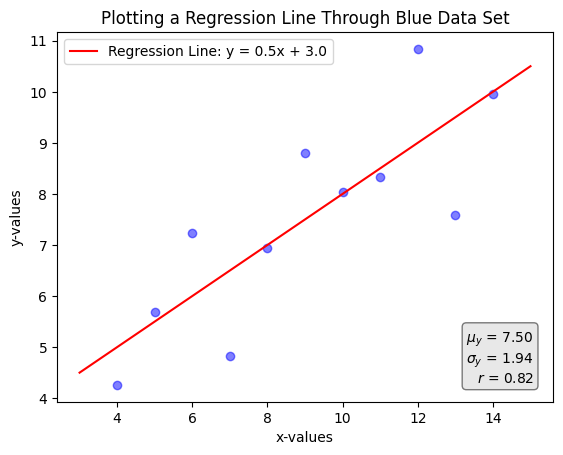

In [3]:
##############
## Plotting ##
##############

data_set_type = datasets['I']

# Regression coefficients, and general statistics
beta, alpha = np.polyfit(data_set_type[0], data_set_type[1], deg = 1)
x_line = np.linspace(min(data_set_type[0])-1, max(data_set_type[0])+1, 100)
y_line = alpha + beta*x_line
mean, std, corr = get_stats(data_set_type)

plt.scatter(data_set_type[0], data_set_type[1], color='blue', alpha=0.5)
plt.plot(x_line, y_line, color ='r', label = f'Regression Line: y = {round(beta,2)}x + {round(alpha,2)}')
plt.legend()
plt.title('Plotting a Regression Line Through Blue Data Set')
plt.xlabel('x-values')
plt.ylabel('y-values')

# Create a text box at the bottom with the mean and standard deviation
textstr = f'$\\mu_y$ = {mean:.2f}\n$\\sigma_y$ = {std:.2f}\n$r$ = {corr:.2f}'
props = dict(boxstyle='round', facecolor='lightgrey', ec='black', alpha=0.5)
plt.gcf().text(0.87, 0.15, textstr, fontsize=10, bbox=props, c='black',horizontalalignment='right')

plt.show()

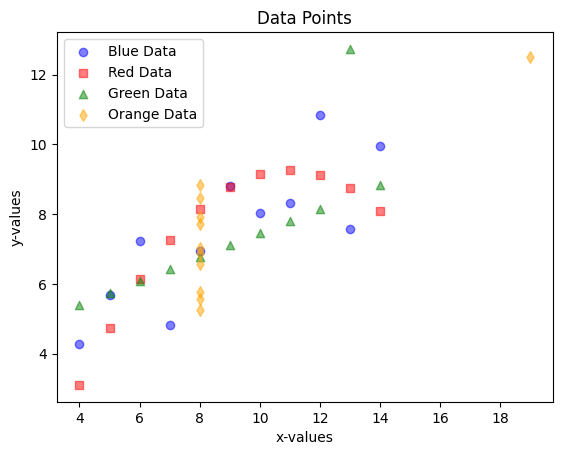

In [4]:
###########################
## Plotting without line ##
###########################

data_set_type = datasets['I']

plt.scatter(data_set_type[0], data_set_type[1], color = 'blue', alpha=0.5, marker="o", label = 'Blue Data')
plt.scatter(datasets['II'][0], datasets['II'][1], color = 'red', alpha=0.5, marker="s", label = 'Red Data')
plt.scatter(datasets['III'][0], datasets['III'][1], color = 'green', alpha=0.5, marker="^", label = 'Green Data')
plt.scatter(datasets['IV'][0], datasets['IV'][1], color = 'orange', alpha=0.5, marker="d", label = 'Orange Data')
plt.title('Data Points')
plt.legend()
plt.xlabel('x-values')
plt.ylabel('y-values')

plt.show()

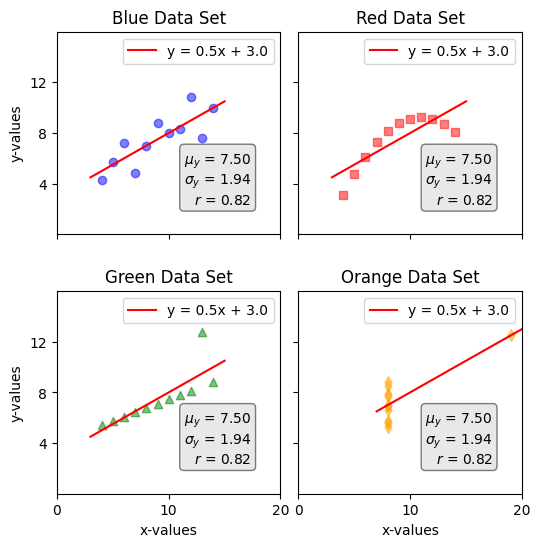

In [5]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6), gridspec_kw={'wspace': 0.08, 'hspace': 0.28})

# Define colors and markers
colors  = ['blue', 'red', 'green', 'orange'] 
markers = ['o', 's', '^', 'd']

# Set limits and ticks for all subplots
for ax in axs.flatten():
    ax.set(xlim=(0, 20), ylim=(0, 16))
    ax.set(xticks=(0, 10, 20), yticks=(4, 8, 12))

# Loop through each dataset and plot in the corresponding subplot
for i, dataset_key in enumerate(datasets.keys()):
    data_set_type = datasets[dataset_key]

    # Regression coefficients and general statistics
    beta, alpha = np.polyfit(data_set_type[0], data_set_type[1], deg=1)
    x_line = np.linspace(min(data_set_type[0])-1, max(data_set_type[0])+1, 100)
    y_line = alpha + beta * x_line
    mean, std, corr = get_stats(data_set_type)

    # Get the current axes based on the index
    ax = axs[i // 2, i % 2]

    # Create scatter plot and regression line in the corresponding subplot
    ax.scatter(data_set_type[0], data_set_type[1], color=colors[i], marker=markers[i], alpha=0.5)
    ax.plot(x_line, y_line, color='r', label=f'y = {round(beta, 2)}x + {round(alpha, 2)}')
    ax.legend()
    ax.set_title(f'{colors[i].capitalize()} Data Set')
    
    # Create a text box at the bottom with the mean and standard deviation
    textstr = f'$\\mu_y$ = {mean:.2f}\n$\\sigma_y$ = {std:.2f}\n$r$ = {corr:.2f}'
    props = dict(boxstyle='round', facecolor='lightgrey', ec='black', alpha=0.5)
    ax.text(0.87, 0.15, textstr, fontsize=10, bbox=props, transform=ax.transAxes, horizontalalignment='right')

# Overall layout adjustments
# plt.suptitle('Regression Analysis of Datasets', fontsize=16)

# Set the overall x and y labels for the figure
for ax in axs[1, :]:  # Bottom row for x-axis labels
    ax.set_xlabel('x-values')

for ax in axs[:, 0]:  # Left column for y-axis labels
    ax.set_ylabel('y-values')


# Set the overall x and y labels for the figure at the center
# fig.text(0.5, 0.04, 'x-values', ha='center', fontsize=12)  # Centered x-axis label
# fig.text(0.04, 0.5, 'y-values', va='center', rotation='vertical', fontsize=12)  # Centered y-axis label

# Show the plot
plt.show()